<a href="https://colab.research.google.com/github/FarzinRad/Bike-Sharing-Analysis/blob/main/Bike_Sharing_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BIKE SHARING ANALYSIS

In this project I want analysis a bike share service and find some useful patterns based on some features like **time features** and **weather conditions**.

In this project I will apply some concepts like **visualiziation**, **hypothesis testsing** and **time series analysis** in my dataset.

P.N: This data can be use in the same businesses and services like food delivery, bike delivery and so on... . 

What our metrics?

There are two type metrics; 
- firstly, business (Company) metrics and 
- secondly, customers (Users) metrics.

**business metrics like**: expected bike demand in a specific area by specific time frame, which can increase the revenue and customer satisfaction. Another metric can be bike relocation which can optimize and reduce operational costs.

**Customer metrics like:** The most important of metrics of user side can be the aalibility of bikes in the shortest time.

### My Dataset:

I'll use the bike sharing data from **Capital Bikeshare in Washington, D.C., USA**, for the period **between January 1, 2011, and December 31, 2012**. The data is <u>aggregated on an hourly basis</u>. This means that no initial and final locations of the individual rides are available, but only the total number of rides per hour.
Moreover, additional <u>meteorological information</u> is available in the data,
which could serve as a driving factor for identifying the total number of requests for a specific time frame (bad weather conditions could have a substantial impact on bike sharing demand).

The original dataset is available at https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#.

Also it's avalible in my GIT Repo:
https://github.com/FarzinRad/Bike-Sharing-Analysis


## Data Set Information:

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


### Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link](http://dchr.dc.gov/page/holiday-schedule))
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered





In [2]:
#Before everything we should import libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


In [3]:
df = pd.read_csv('hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
#lets discribe our data:
df.shape

(17379, 17)

In [5]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Well done :), fortunately, we don't have any null values.

So, in the next step describe our data with describe func.

In [6]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


Now, one of the most important things in our process is make a human readble of categorical our data,
so in the next steps make it huaman readble :)

In [8]:
#At first make a copy of the orginal dataframe (because we need to have the orginal data for some reason like ML process)
#In ML process it's better to keep our format and don't change it.

#preprocess dataframe = pre_df (name rule)

pre_df = df.copy()
pre_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
#Now I want to change the saeson from 1-2-3-4 to winter, spring, ...
#from the attribute info in above, we now: season : season (1:winter, 2:spring, 3:summer, 4:fall)
#so Let's use the Mapping :)

SeasonMapping = {1 : 'winter', 2 : 'spring', 3 : 'summer', 4 : 'autumn'}

#Now apply it to our df, IMPORTANT NOTE: This cell can run onece time (fot lambda func)
pre_df['season']= pre_df['season'].apply(lambda x : SeasonMapping[x])

In [10]:
pre_df.tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,17379,2012-12-31,winter,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [11]:
#Now we should change Year values from 0, 1 to 2011 and 2012
#from the attribute info in above, we now: yr : year (0: 2011, 1:2012)
#so Let's use the Mapping :)

YearMapping = {0 : 2011, 1 : 2012}
pre_df['yr'] = pre_df['yr'].apply(lambda x : YearMapping[x] )

#IMPORTANT NOTE: This cell can run onece time (fot lambda func)

In [12]:
pre_df.tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,17379,2012-12-31,winter,2012,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [13]:
#In this step transfer weekday from numbers to name of weekday
#from the attribute info in above, we now: weekday : day of the week
#but we dont know about min and max, so find the min and max for mapping
pre_df.weekday.min()

0

In [14]:
WeekdayMapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wendsday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
pre_df['weekday'] = pre_df['weekday'].apply(lambda x : WeekdayMapping[x] )
#IMPORTANT NOTE: This cell can run onece time (fot lambda func)

In [15]:
pre_df.tail(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17378,17379,2012-12-31,winter,2012,12,23,0,Monday,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [16]:
#Now lets transfer the weather 
'''
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
'''

WeatherMapping = {1: 'Clear', 2: 'Cloudy', 3: 'light_rain_snow', 4: 'Heavy_rain_snow'}

pre_df['weathersit'] = pre_df['weathersit'].apply(lambda x : WeatherMapping[x] )

In [17]:
pre_df.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16


In [18]:
#In this step, chnahe humadity to 0 to 100 precent

pre_df['hum'] = pre_df['hum'] * 100

In [19]:
pre_df.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16


In [20]:
#And in the last step transfer windspeed between 0 to 67 
pre_df['windspeed'] = pre_df['windspeed'] * 67

In [21]:
pre_df.head(1)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,winter,2011,1,0,0,Saturday,0,Clear,0.24,0.2879,81.0,0.0,3,13,16


## Register VS Casual

In the next step, I want to analyze the Register users, Casual users and cnt users.

In first step check the relation between:

cnt = Regisrer + Casual

In the second step we should check the distribution, So lets go :) 

In [22]:
# We use the assert func in python to check the truth of the cnt col
#The assert keyword lets you test if a condition in your code returns True, 
#if not, the program will raise an AssertionError.

assert(pre_df['cnt'] == (pre_df['registered'] + pre_df['casual']) ).all()

As you can see we don't have any error, then all cnt = register + casual

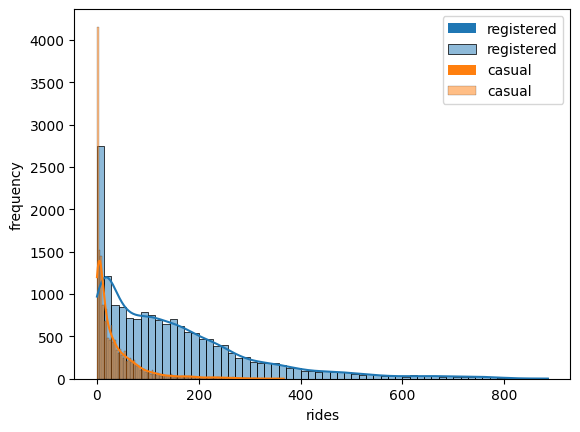

In [23]:
#plot the registered and casual distribution 
sns.histplot(pre_df['registered'], label = 'registered', kde=True)
sns.histplot(pre_df['casual'], label = 'casual', kde=True)
plt.legend()
plt.xlabel('rides')
plt.ylabel('frequency')
plt.savefig('dist.png', format='png')

### What We can Infer of this chart?

Firstly, the number of registered users are bigger than casual users.

Secondly, the vast amount of users use our service in zero-small rides.

Next, Both distribution are skwed to the right

In the next step I want to find the number of rides for each days based on based on Registered and casual users, 
for this I'll use the groupby func and sum func.

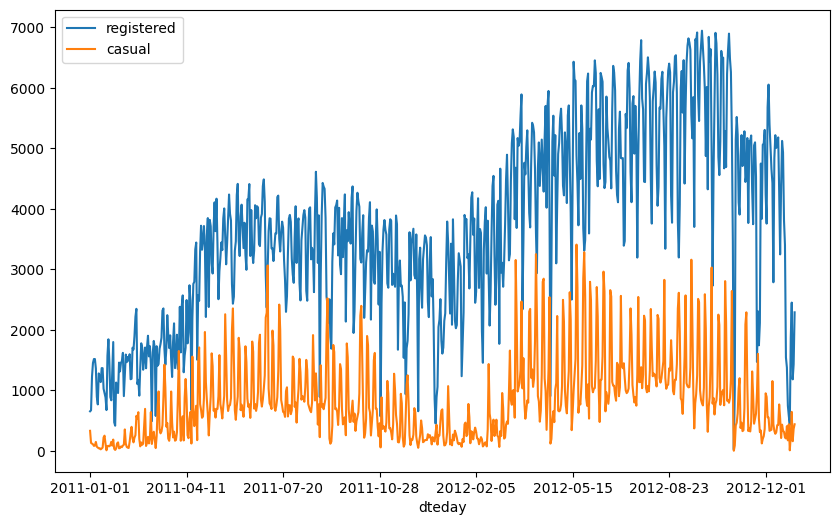

In [29]:
plot_data = pre_df[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum()
ax.plot(figsize = (10, 6));
# ax.set_xlabel('time/days');
# ax.set_ylabel('Number of rides');
plt.savefig('NumberOfRidesPerDay.png', format='png')